# Aula 09 - Trabalhando com dados

# Exercício 01:

O dataset mostrado a seguir possui 6 colunas que descrevem atributos relacionadas ao desenvolvimento de 170 países. Esse conjunto de dados pode ser encontrado [aqui](https://data.world/jbp12/170-countries-with-gdp-per-capita-and-econometric-factors#). O objetivo principal desse exercício é que, de forma exploratória, você encontre correlações interessantes entre essas colunas e verifique que é possível representar esse mesmo dataset com menos atributos sem muita perda de informação a partir do PCA. 

Como avaliar se a sua solução é boa? Nesse caso, espera-se que países com características socio-econômicas parecidas estejam próximos também nas primeiras dimensões do PCA. Além disso, quanto mais os dois primeiros componentes explicar da variação dos dados, melhor. Mas cuidado, se você não fizer nenhuma transformação dos dados originais, pode encontrar um único componente que represente a variação de apenas uma das colunas, principalmente se essa coluna contiver dados em uma escala muito maior que a das outras colunas.

Também fique atento à colunas com cauda pesada. Se for o caso, você pode reduzir a variância da coluna a partir de uma transformação logarítmica. Se você for fazer isso, use o logaritmo neperiano para que os seus resultados sejam os mesmos do gabarito.

In [179]:
matplotlib inline

In [180]:
import pandas as pd
df = pd.read_csv("data/Countries.csv")
df = df.dropna()
df

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
0,1,Albania,3965,0.987,14.0,0.227,3038594,-3.3
1,2,Algeria,4206,0.800,27.7,0.107,39670000,-0.9
2,3,Andorra,42500,1.000,3.6,0.006,86165,0.0
3,4,Angola,4102,0.711,76.5,0.050,25020000,-0.1
4,5,Anguilla,8800,0.950,3.4,0.029,15000,11.9
5,6,Argentina,13432,0.981,11.1,0.082,43420000,-0.1
6,7,Armenia,3499,0.998,13.1,0.217,3018000,-5.7
7,8,Australia,56328,0.990,3.2,0.025,23780000,5.6
8,9,Austria,43439,0.980,3.4,0.014,8611000,5.2
9,10,Azerbaijan,5496,0.998,24.7,0.047,9651000,0.0


__a)__ Busque por correlações interessantes nos dados. Para isso, implemente uma função _countriesCorrelations(i, j)_ com esse mesmo nome e parêmetros que, dado o id de duas colunas da matriz dos dados, retorna uma __tripla__ contendo o nome das colunas (na ordem em que foram dadas, ou seja, nome da coluna i,  nome da coluna j) e a correlação entre elas com uma precisão de 4 casas decimais. 


__Dica:__  
a função _round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

In [181]:
# YOUR CODE HERE
from numpy import corrcoef as correlation

def countriesCorrelations(i, j):
    c1 = df.iloc[:,i].values
    c2 = df.iloc[:,j].values

    correlacao = correlation(c1,c2)[1,0]
    return (df.columns[i], df.columns[j], round(correlacao, 4))

In [182]:
from nose.tools import assert_equal

tests = [[2, 3, ('GDPPC', 'Literacy', 0.3754)], 
         [3, 4, ('Literacy', 'InfantMortality', -0.8154)], 
         [4, 5, ('InfantMortality', 'Agriculture', 0.7471)], 
         [5, 6, ('Agriculture', 'Population', 0.0112)]]

for i, j, result in tests:
    assert_equal(countriesCorrelations(i, j), result)

__b)__ Reduza a dimensionalidade dos dados a partir do PCA. Remova dos seus dados todas as colunas que tenham correlações absolutas (módulo da correlação) menores que $0.1$ com todas as outras colunas. Para isso, implemente uma função _pcs()_ com esse mesmo nome e sem parâmetros que, retorne uma lista com todos os componentes principais, em ordem de importância e com todos os valores com uma precisão de 4 casas decimais. Por exemplo, imagine que temos apenas 3 colunas (3 componentes), o retorno deve ser do tipo: [[-0.5665, -0.5721, 0.5932], [0.7442, -0.6643, 0.07], [-0.354, -0.4811, -0.802]] onde [-0.5665, -0.5721, 0.5932] corresponde ao primeiro pc, [0.7442, -0.6643, 0.07] ao segundo e [-0.354, -0.4811, -0.802] ao terceiro.


__Dica:__  
a função _round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

Resolva usando o PCA do `sklearn`:

In [209]:
# YOUR CODE HERE
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import numpy as np

# acha colunas válidas     
col = []
for i in range(2, df.shape[1]):
    for j in range(2, df.shape[1]):
        if i != j:
            a = countriesCorrelations(i,j)[2]
            if abs(a) > 0.1:
                col.append(i)
                break

# monta matrix     
df2 = df.iloc[:, col]
m = np.matrix(df2, dtype='object')
matrix = np.matrix(m)
matrix = normalize(matrix)    

def pcs(): 
    pca = PCA()
    pca.fit(matrix)
    return np.round(pca.components_, 4)
    
print(pcs())

[[-0.0931  0.0069  0.9955  0.0057 -0.0145]
 [ 0.3225  0.0193  0.0163 -0.0079 -0.9462]
 [-0.9405 -0.0484 -0.0923  0.0067 -0.3232]
 [-0.0484  0.9803 -0.0124  0.1913  0.0016]
 [ 0.019  -0.1906 -0.0026  0.9815 -0.0056]]


__Extra!__ Resolva usando o `principal_component_analysis` do módulo `working_with_data` do livro texto (você pode alterar os métodos dos módulos):


__Atenção:__  
O nome da função agora deve ser _pcs2()_ ! E, assim como a função _pcs()_ implementada anteriormente, ela deve retornar uma lista com todos os componentes principais, em ordem de importância e com todos os valores com uma precisão de 4 casas decimais. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

__c)__ O método PCA que implementamos apenas nos diz, de forma iterativa, quais são as direções que maximizam a variação dos dados. Outro atributo importante do PCA é que, para cada dimensão, é possível saber o quanto que ela explica da variação (e.g. 80% da variação). Para isso, implemente uma função _pct_variance_explained(X)_ com esse mesmo nome e parâmetros que recebe a matriz de dados e retorna um vetor contendo a porcentagem da variância expliacada por cada componente com precisão de 4 casas decimais. Além disso, __fora da função__ desenhe o [gráfico da variância explicada acumulada](https://www.researchgate.net/figure/Principal-component-analysis-The-cumulative-explained-variance-in-the-principal_fig2_230755780). 

__Dica:__  
a função np.round(v, decimals=n) retorna os valores contidos no np.array v com uma precisão de n casas decimais.


Resolva usando o PCA do `sklearn`:

[0.9959 0.0027 0.0013 0.     0.    ]


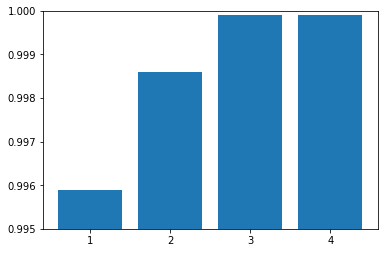

In [298]:
# YOUR CODE HERE
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

def _pct_variance_explained(X):
    pca = PCA()
    pca.fit(X)
    return np.round(pca.explained_variance_ratio_, decimals=4)

a = _pct_variance_explained(matrix)
print(a)

y = [sum(a[0:x]) for x in range(1,len(a))]

x = []
for i in range(1, len(y) + 1):
    x.append(i)

plt.bar(x,y, align='center')
plt.ylim(min(y) - 0.0009, max(y) + 0.00009)
plt.xticks(x, x)
plt.show()

__Extra!__ Resolva usando o `principal_component_analysis` do módulo `working_with_data` do livro texto (você pode alterar os métodos dos módulos).


__Atenção:__  
O nome da função agora deve ser _pct_variance_explained2(X, pcs)_ ! E, assim como a função _pct_variance_explained(X)_ implementada anteriormente, ela deve retornar um vetor contendo a porcentagem da variância expliacada por cada componente com precisão de 4 casas decimais. Note que agora, essa função recebe além da matriz X com os dados, os PCS! Não se esqueça de desenhar, fora da função, o gráfico da variância explicada acumulada. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

__d)__ Desenhe o gráfico dos pontos projetados nos dois componentes principais e associe por volta de 20% dos pontos com os seus nomes.

Resolva usando o PCA do `sklearn`:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

__Extra!__ Resolva usando o `principal_component_analysis` do módulo `working_with_data` do livro texto (você pode alterar os métodos dos módulos):

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()